# MS Data Preprocessing Pipeline

### Input

-   **metadata file:** `.tsv` file with samples as rows and variables as columns.

    Example:


    <span style="color:red"><sup>*necessary columns (use same column name)</sup></span>
    
<style>
/* Keep this once per notebook. It only tweaks colors for the 6th–7th columns. */
table.dataframe thead th:nth-child(6),
table.dataframe thead th:nth-child(5),
table.dataframe tbody td:nth-child(6),
table.dataframe tbody td:nth-child(5) { color: red}
</style>

<table class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>label_ID</th>
      <th>group</th>
      <th>plate_position</th>
      <th>plate_nr</th>
      <th>sample_name</th>
      <th>sample_type</th>
      <th>study_ID</th>
      <th>timepoint</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>4374572456</td><td>Intervention</td><td>A1</td><td>1</td><td>Plate1_A1</td><td>sample</td><td>1000-01</td><td>baseline</td></tr>
    <tr><td>4374596295</td><td>Intervention</td><td>A2</td><td>1</td><td>Plate1_A2</td><td>sample</td><td>1000-02</td><td>baseline</td></tr>
    <tr><td>4374586525</td><td>Control</td><td>B1</td><td>1</td><td>Plate1_B1</td><td>sample</td><td>1000-03</td><td>baseline</td></tr>
    <tr><td>4374578485</td><td>Control</td><td>B2</td><td>1</td><td>Plate1_B2</td><td>sample</td><td>1000-04</td><td>baseline</td></tr>
    <tr><td>4374552863</td><td>-</td><td>A1</td><td>2</td><td>Plate2_A1</td><td>QC</td><td>1000-05</td><td>baseline</td></tr>
    <tr><td>4374572494</td><td>Intervention</td><td>A2</td><td>2</td><td>Plate2_A2</td><td>sample</td><td>1000-01</td><td>day15</td></tr>
    <tr><td>4374562953</td><td>Intervention</td><td>B1</td><td>2</td><td>Plate2_B1</td><td>sample</td><td>1000-02</td><td>day15</td></tr>
    <tr><td>4374573958</td><td>Control</td><td>B2</td><td>2</td><td>Plate2_B2</td><td>sample</td><td>1000-03</td><td>day15</td></tr>
    <tr><td>4374582638</td><td>Control</td><td>A1</td><td>3</td><td>Plate3_A1</td><td>sample</td><td>1000-04</td><td>day15</td></tr>
    <tr><td>4374597831</td><td>-</td><td>A3</td><td>3</td><td>Plate3_A3</td><td>QC</td><td>1000-05</td><td>day15</td></tr>
  </tbody>
</table>


</br>
</br>

-   **proteomes file:** `.tsv` file with proteins as rows and samples as columns. Columns should contain information to reconstruct identifiers contained in the `sample_name` column of the metadata

    Example:

| <span style="color:red">protein</span> | .\\MSdata\\20250101_STUDY_AB_<span style="color:red">Plate1_A1</span>.mzML | .\\MSdata\\20250101_STUDY_AB_<span style="color:red">Plate1_A2</span>.mzML2 | .\\MSdata\\20250101_STUDY_AB_<span style="color:red">Plate1_B1</span>.mzML2 | .\\MSdata\\20250101_STUDY_AB_<span style="color:red">Plate1_B2</span>.mzML2 | .\\MSdata\\20250101_STUDY_AB_<span style="color:red">Plate2_A1</span>.mzML2 |
| ------------- | ------------------------------------------- | -------------------------------------------- | -------------------------------------------- | -------------------------------------------- | -------------------------------------------- |
| KV37_HUMAN    | 5,7341E+12                                  | 6,1284E+12                                   | 5,0213E+12                                   | 4,8762E+12                                   | 6,5028E+12                                   |
| LV469_HUMAN   | 8,27461E+11                                 | 7,90531E+11                                  | 9,18455E+11                                  | 7,33641E+11                                  | 8,74102E+11                                  |
| LV861_HUMAN   | 3,9178E+11                                  | 4,2315E+11                                   | 3,5026E+11                                   | 3,1189E+11                                   | 4,0097E+11                                   |
| LV460_HUMAN   | 413846                                      | 482193                                       | 428915                                       | 497330                                       | 455118                                       |
| LV746_HUMAN   | 1,07293E+13                                 | 9,7342E+12                                   | 1,20347E+13                                  | 1,01583E+13                                  | 9,9871E+12                                   |
| LV537_HUMAN   | 15278000000                                 | 13456000000                                  | 17824000000                                  | 16590000000                                  | 14932000000                                  |
| LV233_HUMAN   | 544526                                      | 536778                                       | 593104                                       | 521667                                       | 572684                                       |
| LV218_HUMAN   | 1,18547E+12                                 | 1,29471E+12                                  | 1,05864E+12                                  | 1,34255E+12                                  | 1,12633E+12                                  |
| LV316_HUMAN   | 1,87362E+12                                 | 2,04638E+12                                  | 1,76419E+12                                  | 1,90877E+12                                  | 1,73254E+12                                  |
| LV312_HUMAN   | 415467                                      | 501224                                       | 439772                                       | 462015                                       | 408299                                       |


### Loading data

In [20]:
import pandas as pd
import numpy as np
import MSpreprocessing as msp
from inmoose.pycombat import pycombat_norm

In [ ]:
#Load proteomes from a given TSV file path. 

#path : path to the TSV file containing proteome data
#clean_columns : iuf True, cleans column names by removing directory paths
#extension : removes this extension from the column names 


proteome = msp.load_proteomes('./example_proteome.tsv', clean_columns=True, extension= '.mzML')
proteome

,protein,20250101_STUDY_AB_plate1_A6,20250101_STUDY_AB_plate1_A7,20250101_STUDY_AB_plate1_A8,20250101_STUDY_AB_plate1_A9,20250101_STUDY_AB_plate1_A10,20250101_STUDY_AB_plate1_A11,20250101_STUDY_AB_plate1_A12,20250101_STUDY_AB_plate1_B1,20250101_STUDY_AB_plate1_B2,...,20250101_STUDY_AB_plate2_E5,20250101_STUDY_AB_plate2_E6,20250101_STUDY_AB_plate2_E7,20250101_STUDY_AB_plate2_E8,20250101_STUDY_AB_plate2_E9,20250101_STUDY_AB_plate2_E10,20250101_STUDY_AB_plate2_E11,20250101_STUDY_AB_plate2_E12,20250101_STUDY_AB_plate2_F1,20250101_STUDY_AB_plate2_F2
0,A0A075B6H9,"294,202.000",NaN,NaN,"2,833,010.000","469,337.000",NaN,NaN,"708,579.000",NaN,...,"1,463,820.000","1,829,170.000","67,938.100",NaN,NaN,"1,179,500.000","170,391.000","217,827.000","338,008.000",NaN
1,A0A075B6I9,NaN,"293,076,726.660",NaN,"221,998,872.857",NaN,"91,114,616.909",NaN,NaN,NaN,...,"292,739,197.802",NaN,"222,552,525.795","247,085,056.967","451,082,467.676","247,859,428.310","231,512,744.951","188,207,665.822","84,620,691.247","126,550,377.929"
2,A0A075B6J1,"682,918.210","818,668.127",NaN,"1,412,210.016","3,827,441.968","554,451.105","1,720,504.001",NaN,"1,220,383.026",...,NaN,NaN,"792,516.482","727,471.317","6,556,386.542","1,628,697.957",NaN,"8,301,967.012",NaN,NaN
3,A0A075B6J2,"430,945.752",NaN,NaN,"909,830.840","1,137,261.937","446,561.857",NaN,NaN,"364,354.186",...,"376,272.068","534,238.675","1,832,649.780","7,942,805.341","483,416.237","458,934.373","678,000.351",NaN,"648,328.314","1,037,361.489"
4,A0A075B6J9,"25,116,422.175",NaN,NaN,"40,141,620.667",NaN,"53,241,698.355","16,182,367.609","41,597,974.014","12,508,256.814",...,"6,113,380.712","31,008,476.031",NaN,NaN,"52,177,546.867","37,192,537.292","16,346,478.417",NaN,"31,336,374.940","15,335,697.103"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,268",Q9Y6C2,"19,267.409","13,246.008",NaN,"6,399.877","12,608.051","20,121.298",NaN,NaN,"25,697.882",...,"9,408.636",NaN,"10,155.984","9,358.882",NaN,"8,250.628",NaN,"10,997.668","11,436.988","15,213.806"
"1,269",Q9Y6E0,"392,137.546","95,810.199","130,313.647","245,176.755","277,321.443","477,055.143","418,297.035","143,353.644","260,084.131",...,NaN,"201,683.918","106,203.247","213,561.810","181,350.391",NaN,NaN,"192,456.453","160,164.202","192,171.943"
"1,270",Q9Y6N7,NaN,"10,401.345","12,346.251","8,926.303","11,132.321",NaN,"11,833.937","8,022.108","10,650.190",...,NaN,"9,528.868","9,999.714",NaN,"8,941.279","9,926.209","10,493.583","8,149.919","14,327.218","13,461.093"
"1,271",Q9Y6R7,"10,508,494.815",NaN,"4,609,906.885","18,080,088.206","8,694,106.703","4,134,377.314","3,889,082.636","5,640,642.964","4,611,320.779",...,"12,463,358.129",NaN,"6,863,217.269","5,186,621.120","11,594,475.737","4,640,848.609","12,814,266.065","41,482,980.586","2,790,873.385",NaN


In [123]:
#Rename selected columns of a proteome table to their derived sample IDs.
#The default sample ID is constructed as "<plate_nr>_<position>",
#assuming that these are respectively at positions -2 and -1`.

#df : input dataframe (with cleaned column names)
#sep : str, default "_", separator used to split column names
#plate_nr : positional index of the plate number token.
#position : positional index of the plate position token.
#fields : optional mapping of token names to their positional indices
#restrict_to : columns to attempt to rename. If None, all columns are considered.

proteome = msp.rename_columns_to_sample(
    proteome,
    sep="_",
    plate_nr=-2, #plate_nr
    position=-1 #plate_position
)

proteome

,protein,plate1_A6,plate1_A7,plate1_A8,plate1_A9,plate1_A10,plate1_A11,plate1_A12,plate1_B1,plate1_B2,...,plate2_E5,plate2_E6,plate2_E7,plate2_E8,plate2_E9,plate2_E10,plate2_E11,plate2_E12,plate2_F1,plate2_F2
0,A0A075B6H9,"294,202.000",NaN,NaN,"2,833,010.000","469,337.000",NaN,NaN,"708,579.000",NaN,...,"1,463,820.000","1,829,170.000","67,938.100",NaN,NaN,"1,179,500.000","170,391.000","217,827.000","338,008.000",NaN
1,A0A075B6I9,NaN,"293,076,726.660",NaN,"221,998,872.857",NaN,"91,114,616.909",NaN,NaN,NaN,...,"292,739,197.802",NaN,"222,552,525.795","247,085,056.967","451,082,467.676","247,859,428.310","231,512,744.951","188,207,665.822","84,620,691.247","126,550,377.929"
2,A0A075B6J1,"682,918.210","818,668.127",NaN,"1,412,210.016","3,827,441.968","554,451.105","1,720,504.001",NaN,"1,220,383.026",...,NaN,NaN,"792,516.482","727,471.317","6,556,386.542","1,628,697.957",NaN,"8,301,967.012",NaN,NaN
3,A0A075B6J2,"430,945.752",NaN,NaN,"909,830.840","1,137,261.937","446,561.857",NaN,NaN,"364,354.186",...,"376,272.068","534,238.675","1,832,649.780","7,942,805.341","483,416.237","458,934.373","678,000.351",NaN,"648,328.314","1,037,361.489"
4,A0A075B6J9,"25,116,422.175",NaN,NaN,"40,141,620.667",NaN,"53,241,698.355","16,182,367.609","41,597,974.014","12,508,256.814",...,"6,113,380.712","31,008,476.031",NaN,NaN,"52,177,546.867","37,192,537.292","16,346,478.417",NaN,"31,336,374.940","15,335,697.103"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,268",Q9Y6C2,"19,267.409","13,246.008",NaN,"6,399.877","12,608.051","20,121.298",NaN,NaN,"25,697.882",...,"9,408.636",NaN,"10,155.984","9,358.882",NaN,"8,250.628",NaN,"10,997.668","11,436.988","15,213.806"
"1,269",Q9Y6E0,"392,137.546","95,810.199","130,313.647","245,176.755","277,321.443","477,055.143","418,297.035","143,353.644","260,084.131",...,NaN,"201,683.918","106,203.247","213,561.810","181,350.391",NaN,NaN,"192,456.453","160,164.202","192,171.943"
"1,270",Q9Y6N7,NaN,"10,401.345","12,346.251","8,926.303","11,132.321",NaN,"11,833.937","8,022.108","10,650.190",...,NaN,"9,528.868","9,999.714",NaN,"8,941.279","9,926.209","10,493.583","8,149.919","14,327.218","13,461.093"
"1,271",Q9Y6R7,"10,508,494.815",NaN,"4,609,906.885","18,080,088.206","8,694,106.703","4,134,377.314","3,889,082.636","5,640,642.964","4,611,320.779",...,"12,463,358.129",NaN,"6,863,217.269","5,186,621.120","11,594,475.737","4,640,848.609","12,814,266.065","41,482,980.586","2,790,873.385",NaN


In [124]:
#load metadata
meta = pd.read_csv("./example_meta.tsv", sep="\t", na_values=["NA"])
index_cols = meta.columns.tolist()
meta

,label_id,group,AL_kode,plate_position,plate_nr,sample_name,sample_type,study_ID,timepoint
0,"4,083,906,373",Intervention,"100,005",A6,plate1,plate1_A6,sample,67.000,day_15
1,"4,083,918,930",Intervention,"100,006",A7,plate1,plate1_A7,sample,34.000,day_0
2,"4,083,982,663",Intervention,"100,007",A8,plate1,plate1_A8,sample,63.000,day_0
3,"4,083,907,917",Control,"100,008",A9,plate1,plate1_A9,sample,16.000,day_15
4,"4,083,985,725",Intervention,"100,009",A10,plate1,plate1_A10,sample,79.000,day_0
...,...,...,...,...,...,...,...,...,...
148,"4,083,996,660",Control,"100,153",E10,plate2,plate2_E10,sample,57.000,day_0
149,"4,083,980,445",Intervention,"100,154",E11,plate2,plate2_E11,sample,79.000,day_15
150,"4,083,966,190",Intervention,"100,155",E12,plate2,plate2_E12,sample,35.000,day_15
151,"4,083,947,093",Control,"100,156",F1,plate2,plate2_F1,sample,45.000,day_15


In [125]:

#Create a long-format proteome dataframe by merging metadata and proteome data

#proteome : wide-format proteome matrix 
#meta : metadata dataframe
#merge_on : metadata column to merge on, default "sample_name"

pg_long = msp.make_long_df(proteome, meta)
pg_long

,label_id,group,AL_kode,plate_position,plate_nr,sample_name,sample_type,study_ID,timepoint,protein,LFQ
0,"4,083,906,373",Intervention,"100,005",A6,plate1,plate1_A6,sample,67.000,day_15,A0A075B6H9,"294,202.000"
1,"4,083,906,373",Intervention,"100,005",A6,plate1,plate1_A6,sample,67.000,day_15,A0A075B6J1,"682,918.210"
2,"4,083,906,373",Intervention,"100,005",A6,plate1,plate1_A6,sample,67.000,day_15,A0A075B6J2,"430,945.752"
3,"4,083,906,373",Intervention,"100,005",A6,plate1,plate1_A6,sample,67.000,day_15,A0A075B6J9,"25,116,422.175"
4,"4,083,906,373",Intervention,"100,005",A6,plate1,plate1_A6,sample,67.000,day_15,A0A075B6K0,"7,918,193.726"
...,...,...,...,...,...,...,...,...,...,...,...
"136,237","4,083,966,929",Intervention,"100,157",F2,plate2,plate2_F2,sample,5.000,day_0,Q9Y646,"128,043.914"
"136,238","4,083,966,929",Intervention,"100,157",F2,plate2,plate2_F2,sample,5.000,day_0,Q9Y6C2,"15,213.806"
"136,239","4,083,966,929",Intervention,"100,157",F2,plate2,plate2_F2,sample,5.000,day_0,Q9Y6E0,"192,171.943"
"136,240","4,083,966,929",Intervention,"100,157",F2,plate2,plate2_F2,sample,5.000,day_0,Q9Y6N7,"13,461.093"


In [126]:
#Count proteins per sample and plot a bar chart

#df : long-format dataframe with columns 'sample_name', 'sample_type'.
#save_img : if True, save the figure to `save_path`
#save_path : path to save the figure 

msp.plot_protein_counts(pg_long)

In [127]:
#Plot histogram of protein counts per sample with boxplot margins.

#df : long-format dataframe with columns 'sample_name', 'sample_type'.
#save_img : if True, save the figure to `save_path`
#save_path : path to save the figure

msp.protein_count_histogram(pg_long)

### Missingness Handling

In [128]:
#Filter proteome dataframe by excluding samples whose protein counts 
#are below Q1 - k*IQR, computed within the specified sample level.

#df : long-format dataframe with columns 'sample_name' and 'sample_type'.
#sample_level : level of 'sample_type' used to compute the IQR-based threshold (default "sample").
#k : multiplier for IQR in Tukey's rule, default 1.5

filtered_pg_long = msp.filter_low_count_outliers(pg_long, sample_level="sample", k=1.5)
filtered_pg_long

,label_id,group,AL_kode,plate_position,plate_nr,sample_name,sample_type,study_ID,timepoint,protein,LFQ
0,"4,083,906,373",Intervention,"100,005",A6,plate1,plate1_A6,sample,67.000,day_15,A0A075B6H9,"294,202.000"
1,"4,083,906,373",Intervention,"100,005",A6,plate1,plate1_A6,sample,67.000,day_15,A0A075B6J1,"682,918.210"
2,"4,083,906,373",Intervention,"100,005",A6,plate1,plate1_A6,sample,67.000,day_15,A0A075B6J2,"430,945.752"
3,"4,083,906,373",Intervention,"100,005",A6,plate1,plate1_A6,sample,67.000,day_15,A0A075B6J9,"25,116,422.175"
4,"4,083,906,373",Intervention,"100,005",A6,plate1,plate1_A6,sample,67.000,day_15,A0A075B6K0,"7,918,193.726"
...,...,...,...,...,...,...,...,...,...,...,...
"136,237","4,083,966,929",Intervention,"100,157",F2,plate2,plate2_F2,sample,5.000,day_0,Q9Y646,"128,043.914"
"136,238","4,083,966,929",Intervention,"100,157",F2,plate2,plate2_F2,sample,5.000,day_0,Q9Y6C2,"15,213.806"
"136,239","4,083,966,929",Intervention,"100,157",F2,plate2,plate2_F2,sample,5.000,day_0,Q9Y6E0,"192,171.943"
"136,240","4,083,966,929",Intervention,"100,157",F2,plate2,plate2_F2,sample,5.000,day_0,Q9Y6N7,"13,461.093"


In [129]:
#Build a dynamic range summary and plot from a long proteomics dataframe.

#pg_long : dataframe with columns 'sample_name', 'sample_type', 'protein', 'LFQ'.
#save_img : if True, save the figure to `save_path`
#save_path : path to save the figure 

msp.plot_dynamic_range(filtered_pg_long[filtered_pg_long["sample_type"] != "empty"])

In [130]:
df_wide = filtered_pg_long.pivot(index = meta.columns.tolist(), columns='protein',values = 'LFQ') #hardcoded "protein" colnumn name

#-----------------------------
df_wide = np.log2(df_wide) ### LOG TRANSFORM HERE!!!!!!
#-----------------------------

In [174]:
#only keep sample and QC rows
pg_wide = df_wide.reset_index()
pg_wide[index_cols] = pg_wide[index_cols].astype(str)
pg_wide = (
    pg_wide
      .loc[pg_wide.sample_type != "empty"] #remove empty runs if present, change string if needed
      .set_index(index_cols)
)

pg_wide.index.name = 'Sample ID'
pg_wide.columns.name = 'protein group'  
pg_wide

,,,,,,,,protein group,A0A075B6H9,A0A075B6I9,A0A075B6J1,A0A075B6J2,A0A075B6J9,A0A075B6K0,A0A075B6K2,A0A075B6K4,A0A075B6K5,A0A075B6K6,...,Q9Y608,Q9Y613,Q9Y624,Q9Y646,Q9Y696,Q9Y6C2,Q9Y6E0,Q9Y6N7,Q9Y6R7,Q9Y6Z7
label_id,group,AL_kode,plate_position,plate_nr,sample_name,sample_type,study_ID,timepoint,,,,,,,,,,,,,,,,,,,,,
4083900735,Control,100142,D11,plate2,plate2_D11,sample,28.0,day_15,16.853,NaN,20.635,20.206,25.147,NaN,NaN,27.079,28.532,17.412,...,17.272,16.594,NaN,15.250,NaN,14.092,16.802,13.655,NaN,NaN
4083903081,Control,100015,B4,plate1,plate1_B4,sample,64.0,day_0,18.108,26.028,21.047,20.010,25.518,26.723,19.378,27.943,29.622,17.032,...,16.759,NaN,19.872,14.621,NaN,13.548,16.613,12.958,23.308,23.244
4083903468,Intervention,100036,D1,plate1,plate1_D1,sample,78.0,day_15,18.220,26.013,20.546,20.140,23.923,25.160,21.351,24.757,28.883,18.542,...,16.797,17.563,NaN,16.152,17.784,13.859,17.935,13.297,23.121,23.711
4083903724,Control,100069,F10,plate1,plate1_F10,sample,49.0,day_15,18.835,27.660,NaN,17.837,25.409,24.617,17.600,NaN,27.018,17.446,...,16.803,17.664,19.978,NaN,17.303,15.209,17.399,13.793,22.103,23.167
4083904375,Control,100010,A11,plate1,plate1_A11,sample,8.0,day_15,NaN,26.441,19.081,18.769,25.666,NaN,20.025,24.759,27.057,17.495,...,16.356,NaN,21.178,NaN,17.569,14.296,18.864,NaN,21.979,22.312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083996660,Control,100153,E10,plate2,plate2_E10,sample,57.0,day_0,20.170,27.885,20.635,18.808,25.149,24.279,20.008,24.984,27.700,16.332,...,NaN,17.021,18.361,16.697,16.712,13.010,NaN,13.277,22.146,22.921
4083996961,Intervention,100071,F12,plate1,plate1_F12,sample,29.0,day_0,16.865,27.500,21.987,NaN,24.138,24.951,19.408,25.228,NaN,NaN,...,15.590,17.431,19.067,16.211,NaN,13.152,17.398,13.185,NaN,NaN
4083997419,Control,100065,F6,plate1,plate1_F6,sample,54.0,day_15,18.368,28.113,NaN,19.612,24.385,NaN,NaN,25.260,NaN,19.907,...,17.216,16.902,20.177,16.537,17.268,13.418,18.111,13.333,NaN,23.099


In [175]:
#filter proteins by missingness keeping those with at least 60% non-missing values across samples

#df : long-format dataframe 
#feat_prevalence : float in [0,1], minimum fraction of non-missing values needed
#axis : 0 to filter features (proteins), 1 to filter samples

df_filtered = msp.filter_missingness(pg_wide, feat_prevalence=0.6, axis=0)  
df_filtered

Drop 1 along axis 0.


,,,,,,,,protein group,A0A075B6H9,A0A075B6I9,A0A075B6J1,A0A075B6J2,A0A075B6J9,A0A075B6K0,A0A075B6K2,A0A075B6K4,A0A075B6K5,A0A075B6K6,...,Q9Y608,Q9Y613,Q9Y624,Q9Y646,Q9Y696,Q9Y6C2,Q9Y6E0,Q9Y6N7,Q9Y6R7,Q9Y6Z7
label_id,group,AL_kode,plate_position,plate_nr,sample_name,sample_type,study_ID,timepoint,,,,,,,,,,,,,,,,,,,,,
4083900735,Control,100142,D11,plate2,plate2_D11,sample,28.0,day_15,16.853,NaN,20.635,20.206,25.147,NaN,NaN,27.079,28.532,17.412,...,17.272,16.594,NaN,15.250,NaN,14.092,16.802,13.655,NaN,NaN
4083903081,Control,100015,B4,plate1,plate1_B4,sample,64.0,day_0,18.108,26.028,21.047,20.010,25.518,26.723,19.378,27.943,29.622,17.032,...,16.759,NaN,19.872,14.621,NaN,13.548,16.613,12.958,23.308,23.244
4083903468,Intervention,100036,D1,plate1,plate1_D1,sample,78.0,day_15,18.220,26.013,20.546,20.140,23.923,25.160,21.351,24.757,28.883,18.542,...,16.797,17.563,NaN,16.152,17.784,13.859,17.935,13.297,23.121,23.711
4083903724,Control,100069,F10,plate1,plate1_F10,sample,49.0,day_15,18.835,27.660,NaN,17.837,25.409,24.617,17.600,NaN,27.018,17.446,...,16.803,17.664,19.978,NaN,17.303,15.209,17.399,13.793,22.103,23.167
4083904375,Control,100010,A11,plate1,plate1_A11,sample,8.0,day_15,NaN,26.441,19.081,18.769,25.666,NaN,20.025,24.759,27.057,17.495,...,16.356,NaN,21.178,NaN,17.569,14.296,18.864,NaN,21.979,22.312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083996660,Control,100153,E10,plate2,plate2_E10,sample,57.0,day_0,20.170,27.885,20.635,18.808,25.149,24.279,20.008,24.984,27.700,16.332,...,NaN,17.021,18.361,16.697,16.712,13.010,NaN,13.277,22.146,22.921
4083996961,Intervention,100071,F12,plate1,plate1_F12,sample,29.0,day_0,16.865,27.500,21.987,NaN,24.138,24.951,19.408,25.228,NaN,NaN,...,15.590,17.431,19.067,16.211,NaN,13.152,17.398,13.185,NaN,NaN
4083997419,Control,100065,F6,plate1,plate1_F6,sample,54.0,day_15,18.368,28.113,NaN,19.612,24.385,NaN,NaN,25.260,NaN,19.907,...,17.216,16.902,20.177,16.537,17.268,13.418,18.111,13.333,NaN,23.099


### Imputation

In [133]:
#one-time per session
#sets local scratch + FastAI defaults
#call this once per session before imputation training if you are on a network drive.

#scratch : target directory for temp files and FastAI artifacts
#if omitted, defaults to ~/fastai_scratch.

msp.configure_fastai_local_tmp()  

Path('C:/Users/aben0177/fastai_scratch')

WARNING	Task(Task-4) py.warnings:warnings.py:_showwarnmsg()- c:\Users\aben0177\Documents\venvs\MSpreprocessing\Lib\site-packages\pimmslearn\sampling.py:209: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead


WARNING	Task(Task-4) py.warnings:warnings.py:_showwarnmsg()- c:\Users\aben0177\Documents\venvs\MSpreprocessing\Lib\site-packages\pimmslearn\sampling.py:210: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead




suggested_lr.valley = 0.00437


epoch,train_loss,valid_loss,time
0,31.634457,69.209679,00:00
1,30.354860,63.113205,00:00
2,25.702492,38.064415,00:00
3,15.922156,6.568691,00:00
4,9.017596,1.627837,00:00
5,5.252840,0.915122,00:00
6,3.209051,0.727259,00:00
7,2.086029,0.665086,00:00
8,1.468835,0.622832,00:00
9,1.124918,0.618384,00:00


No improvement since epoch 9: early stopping


,,,,,,,,protein group,A0A075B6H9,A0A075B6I9,A0A075B6J1,A0A075B6J2,A0A075B6J9,A0A075B6K0,A0A075B6K2,A0A075B6K4,A0A075B6K5,A0A075B6K6,...,Q9Y608,Q9Y613,Q9Y624,Q9Y646,Q9Y696,Q9Y6C2,Q9Y6E0,Q9Y6N7,Q9Y6R7,Q9Y6Z7
label_id,group,AL_kode,plate_position,plate_nr,sample_name,sample_type,study_ID,timepoint,,,,,,,,,,,,,,,,,,,,,
4083900735,Control,100142,D11,plate2,plate2_D11,sample,28.0,day_15,16.853,26.663,20.635,20.206,25.147,24.907,19.069,27.079,28.532,17.412,...,17.272,16.594,19.325,15.250,17.149,14.092,16.802,13.655,22.394,22.679
4083903081,Control,100015,B4,plate1,plate1_B4,sample,64.0,day_0,18.108,26.028,21.047,20.010,25.518,26.723,19.378,27.943,29.622,17.032,...,16.759,16.795,19.872,14.621,17.134,13.548,16.613,12.958,23.308,23.244
4083903468,Intervention,100036,D1,plate1,plate1_D1,sample,78.0,day_15,18.220,26.013,20.546,20.140,23.923,25.160,21.351,24.757,28.883,18.542,...,16.797,17.563,19.648,16.152,17.784,13.859,17.935,13.297,23.121,23.711
4083903724,Control,100069,F10,plate1,plate1_F10,sample,49.0,day_15,18.835,27.660,20.847,17.837,25.409,24.617,17.600,25.993,27.018,17.446,...,16.803,17.664,19.978,16.468,17.303,15.209,17.399,13.793,22.103,23.167
4083904375,Control,100010,A11,plate1,plate1_A11,sample,8.0,day_15,19.427,26.441,19.081,18.769,25.666,25.272,20.025,24.759,27.057,17.495,...,16.356,17.297,21.178,16.531,17.569,14.296,18.864,13.762,21.979,22.312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083996660,Control,100153,E10,plate2,plate2_E10,sample,57.0,day_0,20.170,27.885,20.635,18.808,25.149,24.279,20.008,24.984,27.700,16.332,...,16.959,17.021,18.361,16.697,16.712,13.010,17.663,13.277,22.146,22.921
4083996961,Intervention,100071,F12,plate1,plate1_F12,sample,29.0,day_0,16.865,27.500,21.987,19.889,24.138,24.951,19.408,25.228,27.897,17.382,...,15.590,17.431,19.067,16.211,17.232,13.152,17.398,13.185,22.490,22.776
4083997419,Control,100065,F6,plate1,plate1_F6,sample,54.0,day_15,18.368,28.113,20.914,19.612,24.385,25.212,19.510,25.260,28.009,19.907,...,17.216,16.902,20.177,16.537,17.268,13.418,18.111,13.333,22.745,23.099


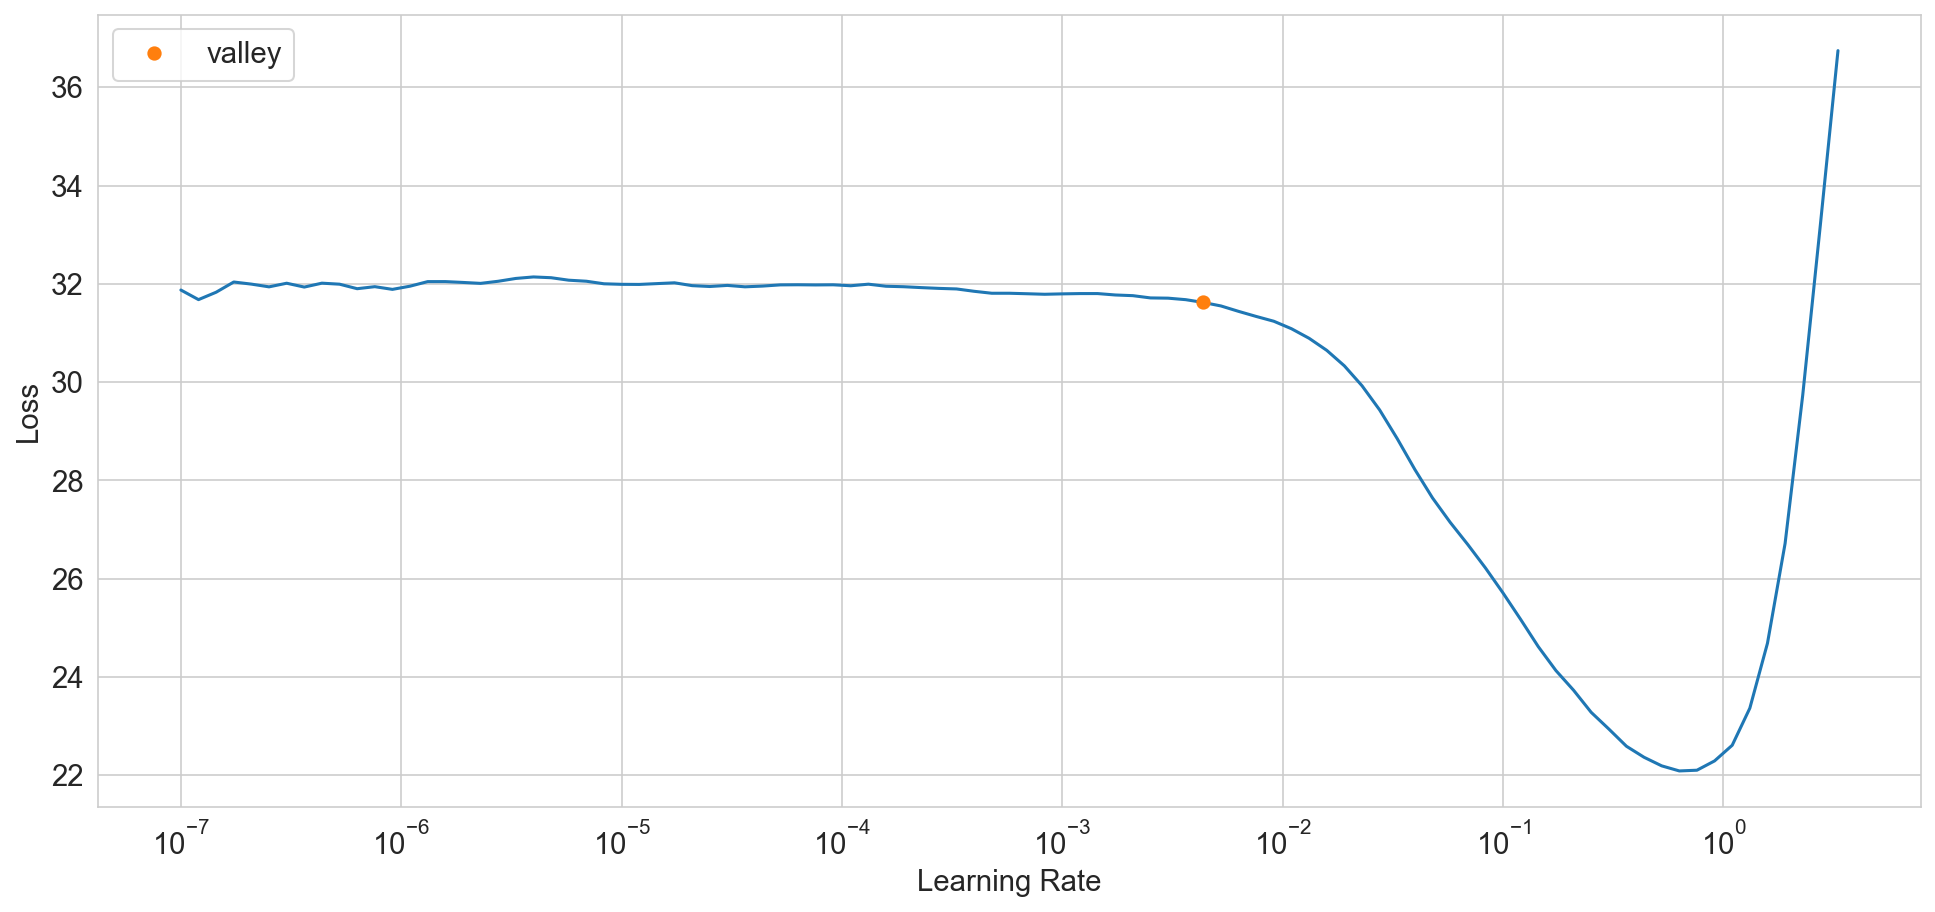

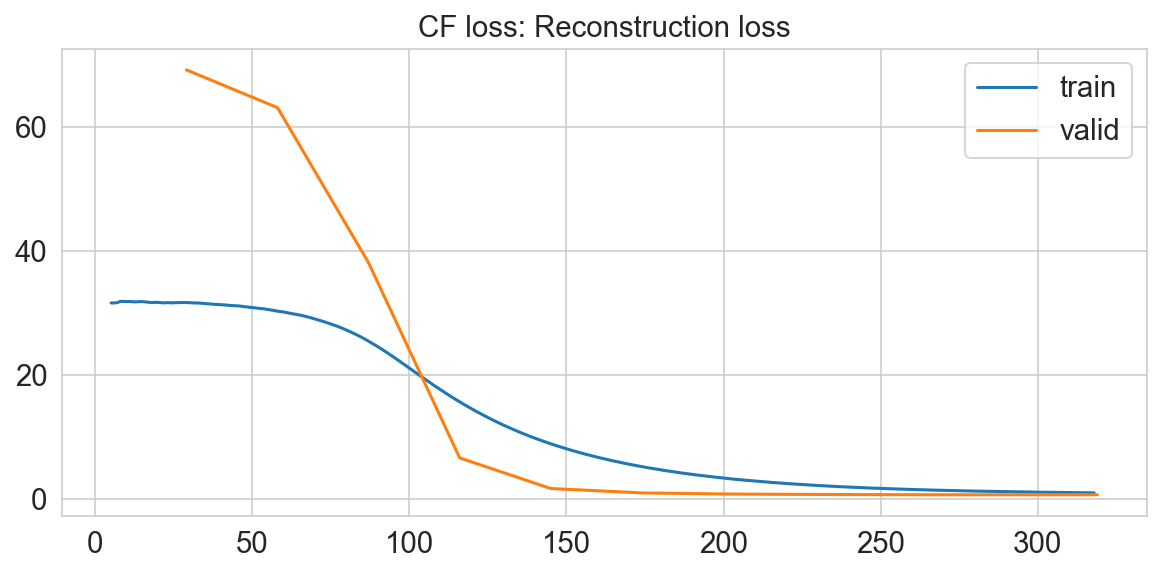

In [176]:
#impute missing values in a wide matrix df_filtered using PIMMSlearn collaborative filtering model.

#df_filtered : wide matrix (rows = samples, columns = features) with missing values to impute.
#epochs : maximum number of training epochs.
#run_locally : if True, change to local_run directory before fitting the model.

cf_imputed = msp.impute_cf(df_filtered, epochs=20, run_locally=True)
cf_imputed

epoch,train_loss,valid_loss,time
0,1246.726318,140.661346,00:00
1,1248.569946,142.926254,00:00
2,1244.955078,142.218277,00:00
3,1238.593628,142.268356,00:00
4,1229.178711,141.536118,00:00
5,1224.751831,140.807419,00:00
6,1215.839111,140.888275,00:00
7,1204.374756,140.941803,00:00
8,1193.459839,142.016342,00:00
9,1182.765137,143.559418,00:00


Masked validation MSE: 0.657737


,,,,,,,,protein group,A0A075B6H9,A0A075B6I9,A0A075B6J1,A0A075B6J2,A0A075B6J9,A0A075B6K0,A0A075B6K2,A0A075B6K4,A0A075B6K5,A0A075B6K6,...,Q9Y608,Q9Y613,Q9Y624,Q9Y646,Q9Y696,Q9Y6C2,Q9Y6E0,Q9Y6N7,Q9Y6R7,Q9Y6Z7
label_id,group,AL_kode,plate_position,plate_nr,sample_name,sample_type,study_ID,timepoint,,,,,,,,,,,,,,,,,,,,,
4083900735,Control,100142,D11,plate2,plate2_D11,sample,28.0,day_15,16.853,27.866,20.635,20.206,25.147,24.984,19.055,27.079,28.532,17.412,...,17.272,16.594,19.211,15.250,16.820,14.092,16.802,13.655,22.762,22.690
4083903081,Control,100015,B4,plate1,plate1_B4,sample,64.0,day_0,18.108,26.028,21.047,20.010,25.518,26.723,19.378,27.943,29.622,17.032,...,16.759,16.519,19.872,14.621,17.096,13.548,16.613,12.958,23.308,23.244
4083903468,Intervention,100036,D1,plate1,plate1_D1,sample,78.0,day_15,18.220,26.013,20.546,20.140,23.923,25.160,21.351,24.757,28.883,18.542,...,16.797,17.563,19.889,16.152,17.784,13.859,17.935,13.297,23.121,23.711
4083903724,Control,100069,F10,plate1,plate1_F10,sample,49.0,day_15,18.835,27.660,19.583,17.837,25.409,24.617,17.600,26.216,27.018,17.446,...,16.803,17.664,19.978,15.668,17.303,15.209,17.399,13.793,22.103,23.167
4083904375,Control,100010,A11,plate1,plate1_A11,sample,8.0,day_15,18.597,26.441,19.081,18.769,25.666,24.970,20.025,24.759,27.057,17.495,...,16.356,17.466,21.178,16.031,17.569,14.296,18.864,13.470,21.979,22.312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083996660,Control,100153,E10,plate2,plate2_E10,sample,57.0,day_0,20.170,27.885,20.635,18.808,25.149,24.279,20.008,24.984,27.700,16.332,...,16.466,17.021,18.361,16.697,16.712,13.010,17.866,13.277,22.146,22.921
4083996961,Intervention,100071,F12,plate1,plate1_F12,sample,29.0,day_0,16.865,27.500,21.987,19.667,24.138,24.951,19.408,25.228,28.308,17.441,...,15.590,17.431,19.067,16.211,16.987,13.152,17.398,13.185,22.409,22.875
4083997419,Control,100065,F6,plate1,plate1_F6,sample,54.0,day_15,18.368,28.113,20.646,19.612,24.385,24.703,18.911,25.260,28.583,19.907,...,17.216,16.902,20.177,16.537,17.268,13.418,18.111,13.333,22.319,23.099


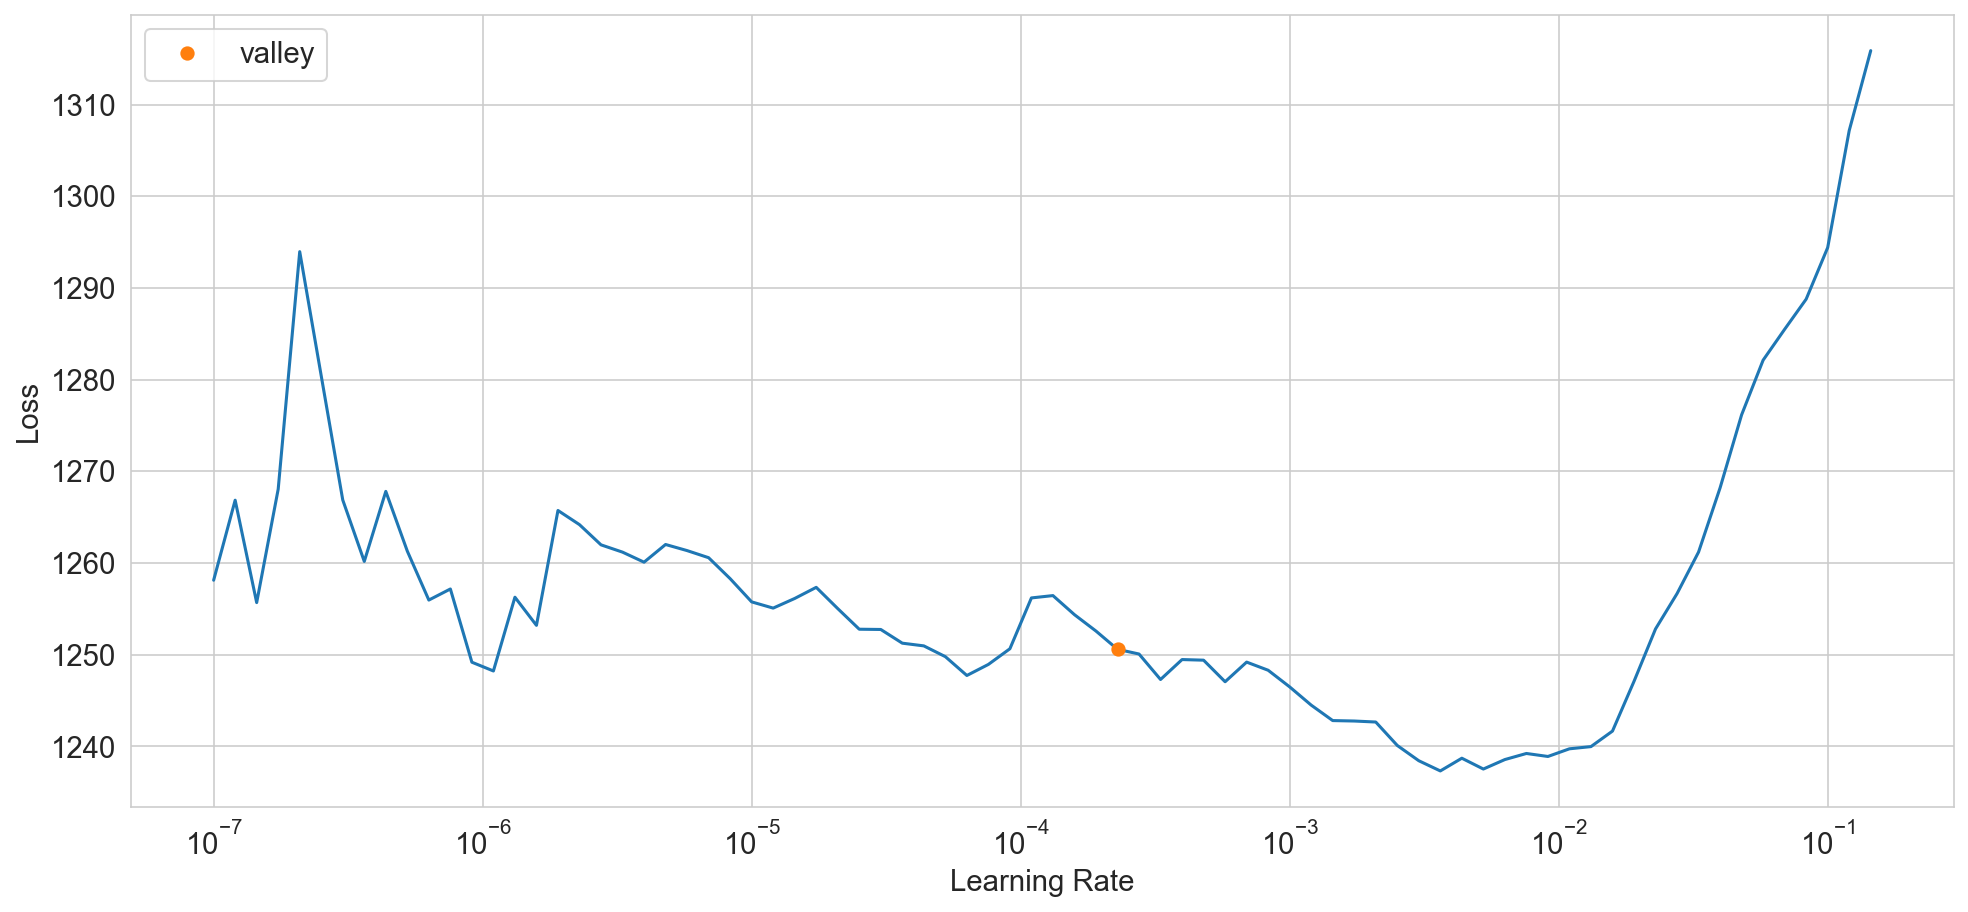

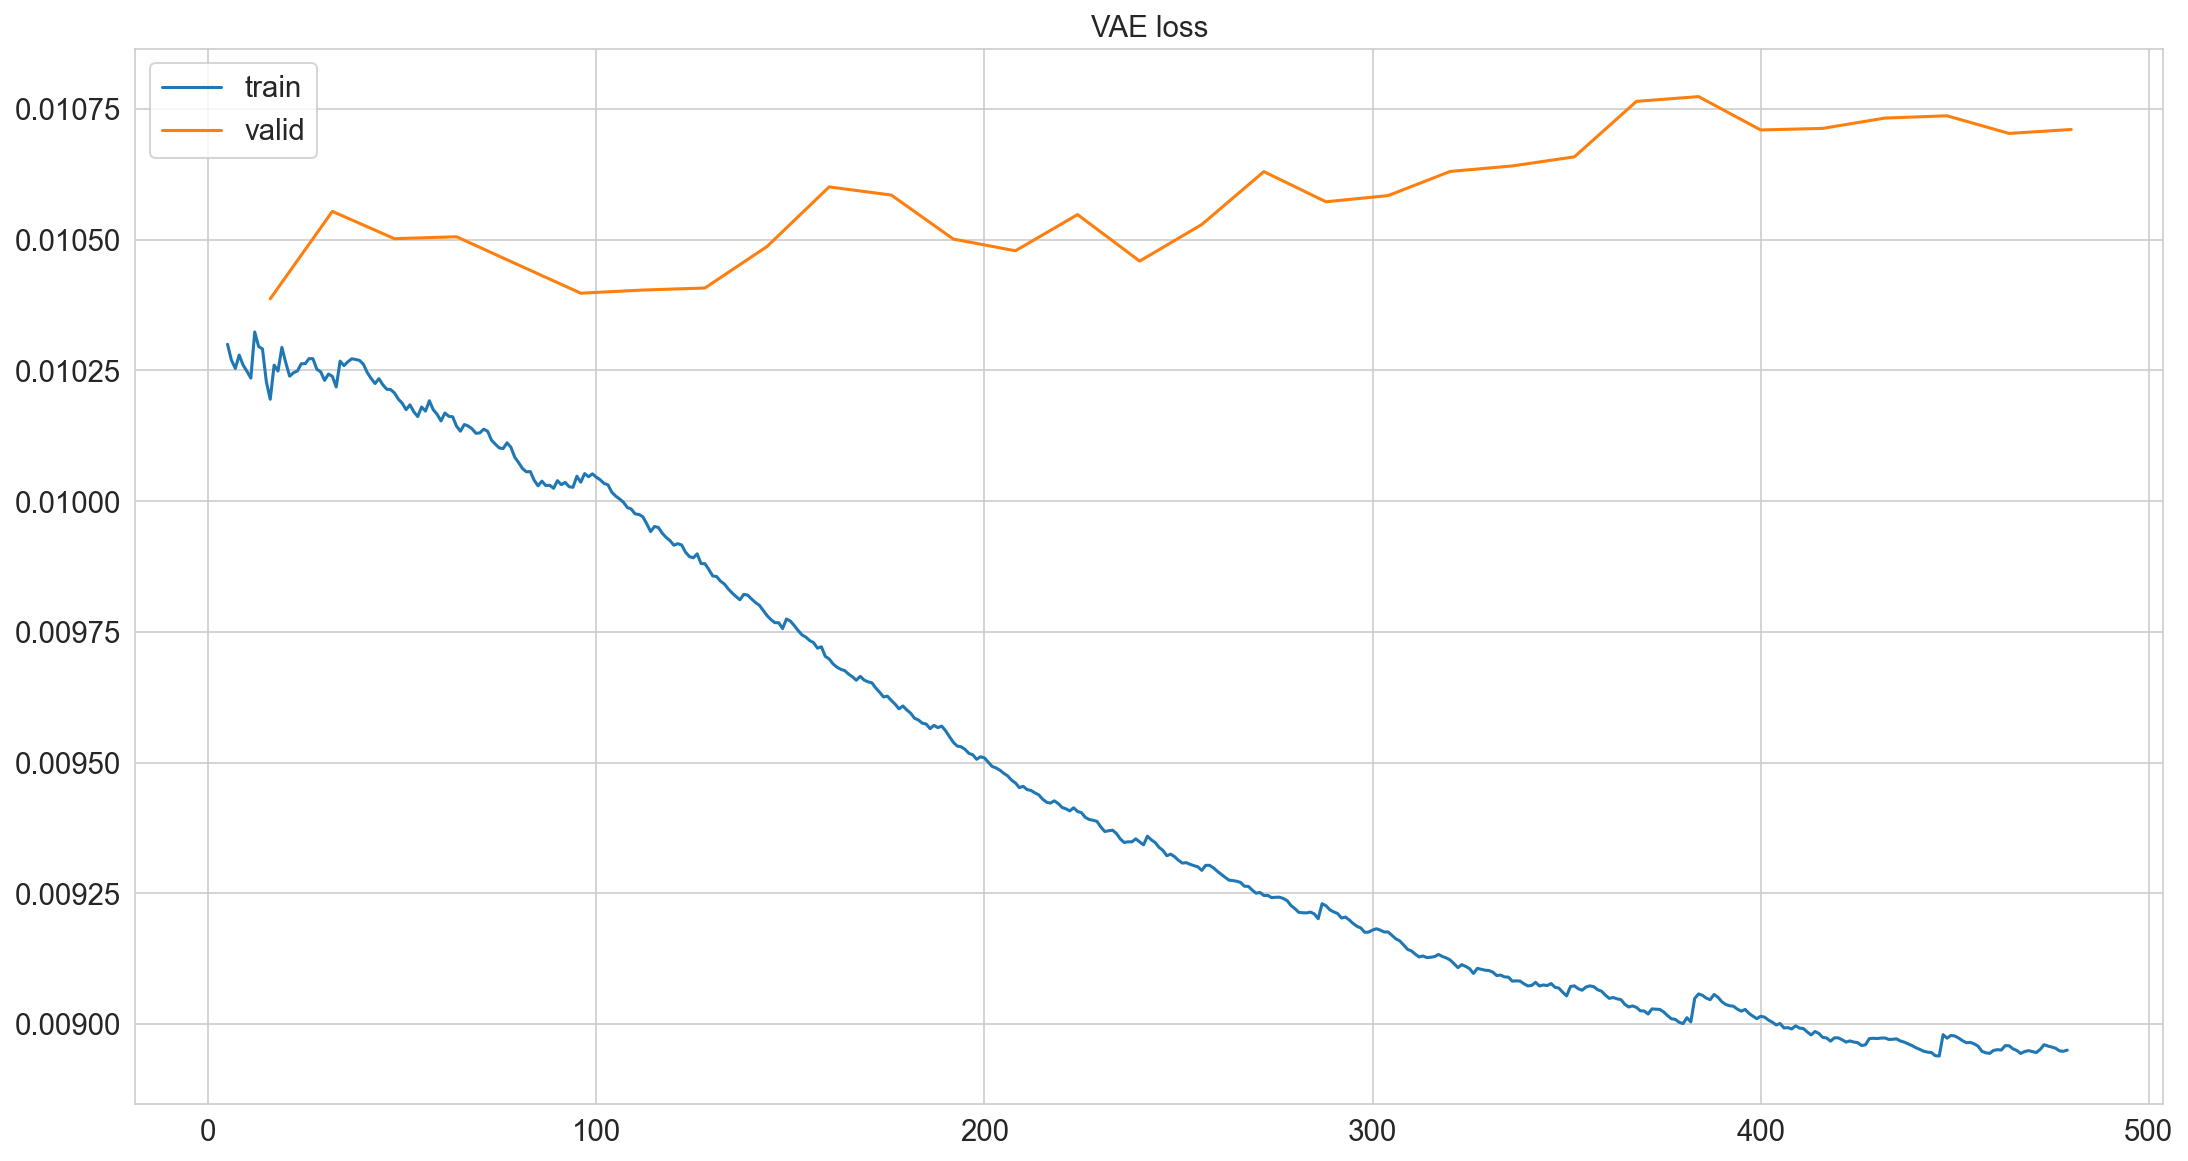

In [177]:
#impute missing values in a wide matrix df_filtered using a PIMMS VAE.

#df_filtered : wide matrix (rows = samples, columns = features) with missing values to impute.
#epochs : maximum number of training epochs.
#run_locally : if True, change to local_run directory before fitting the model.

vae_imputed= msp.impute_vae(df_filtered, epochs=30, run_locally=True)
vae_imputed

epoch,train_loss,valid_loss,time
0,8820.588867,948.887146,00:00
1,8690.250977,962.965332,00:00
2,8475.738281,954.063110,00:00
3,8172.974121,906.307983,00:00
4,7774.981445,879.114075,00:00
5,7423.956055,861.575317,00:00
6,7089.233398,853.686035,00:00
7,6777.379395,847.845276,00:00
8,6471.399414,845.909546,00:00
9,6175.430176,845.476135,00:00


Masked validation MSE: 0.655864


,,,,,,,,protein group,A0A075B6H9,A0A075B6I9,A0A075B6J1,A0A075B6J2,A0A075B6J9,A0A075B6K0,A0A075B6K2,A0A075B6K4,A0A075B6K5,A0A075B6K6,...,Q9Y608,Q9Y613,Q9Y624,Q9Y646,Q9Y696,Q9Y6C2,Q9Y6E0,Q9Y6N7,Q9Y6R7,Q9Y6Z7
label_id,group,AL_kode,plate_position,plate_nr,sample_name,sample_type,study_ID,timepoint,,,,,,,,,,,,,,,,,,,,,
4083900735,Control,100142,D11,plate2,plate2_D11,sample,28.0,day_15,16.853,27.510,20.635,20.206,25.147,25.153,18.318,27.079,28.532,17.412,...,17.272,16.594,18.951,15.250,16.827,14.092,16.802,13.655,23.217,22.647
4083903081,Control,100015,B4,plate1,plate1_B4,sample,64.0,day_0,18.108,26.028,21.047,20.010,25.518,26.723,19.378,27.943,29.622,17.032,...,16.759,16.467,19.872,14.621,17.470,13.548,16.613,12.958,23.308,23.244
4083903468,Intervention,100036,D1,plate1,plate1_D1,sample,78.0,day_15,18.220,26.013,20.546,20.140,23.923,25.160,21.351,24.757,28.883,18.542,...,16.797,17.563,19.972,16.152,17.784,13.859,17.935,13.297,23.121,23.711
4083903724,Control,100069,F10,plate1,plate1_F10,sample,49.0,day_15,18.835,27.660,19.942,17.837,25.409,24.617,17.600,25.962,27.018,17.446,...,16.803,17.664,19.978,14.933,17.303,15.209,17.399,13.793,22.103,23.167
4083904375,Control,100010,A11,plate1,plate1_A11,sample,8.0,day_15,18.173,26.441,19.081,18.769,25.666,25.386,20.025,24.759,27.057,17.495,...,16.356,17.224,21.178,16.271,17.569,14.296,18.864,13.428,21.979,22.312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083996660,Control,100153,E10,plate2,plate2_E10,sample,57.0,day_0,20.170,27.885,20.635,18.808,25.149,24.279,20.008,24.984,27.700,16.332,...,17.208,17.021,18.361,16.697,16.712,13.010,17.035,13.277,22.146,22.921
4083996961,Intervention,100071,F12,plate1,plate1_F12,sample,29.0,day_0,16.865,27.500,21.987,19.317,24.138,24.951,19.408,25.228,28.029,17.206,...,15.590,17.431,19.067,16.211,16.986,13.152,17.398,13.185,22.881,22.757
4083997419,Control,100065,F6,plate1,plate1_F6,sample,54.0,day_15,18.368,28.113,19.761,19.612,24.385,24.892,19.223,25.260,27.772,19.907,...,17.216,16.902,20.177,16.537,17.268,13.418,18.111,13.333,22.563,23.099


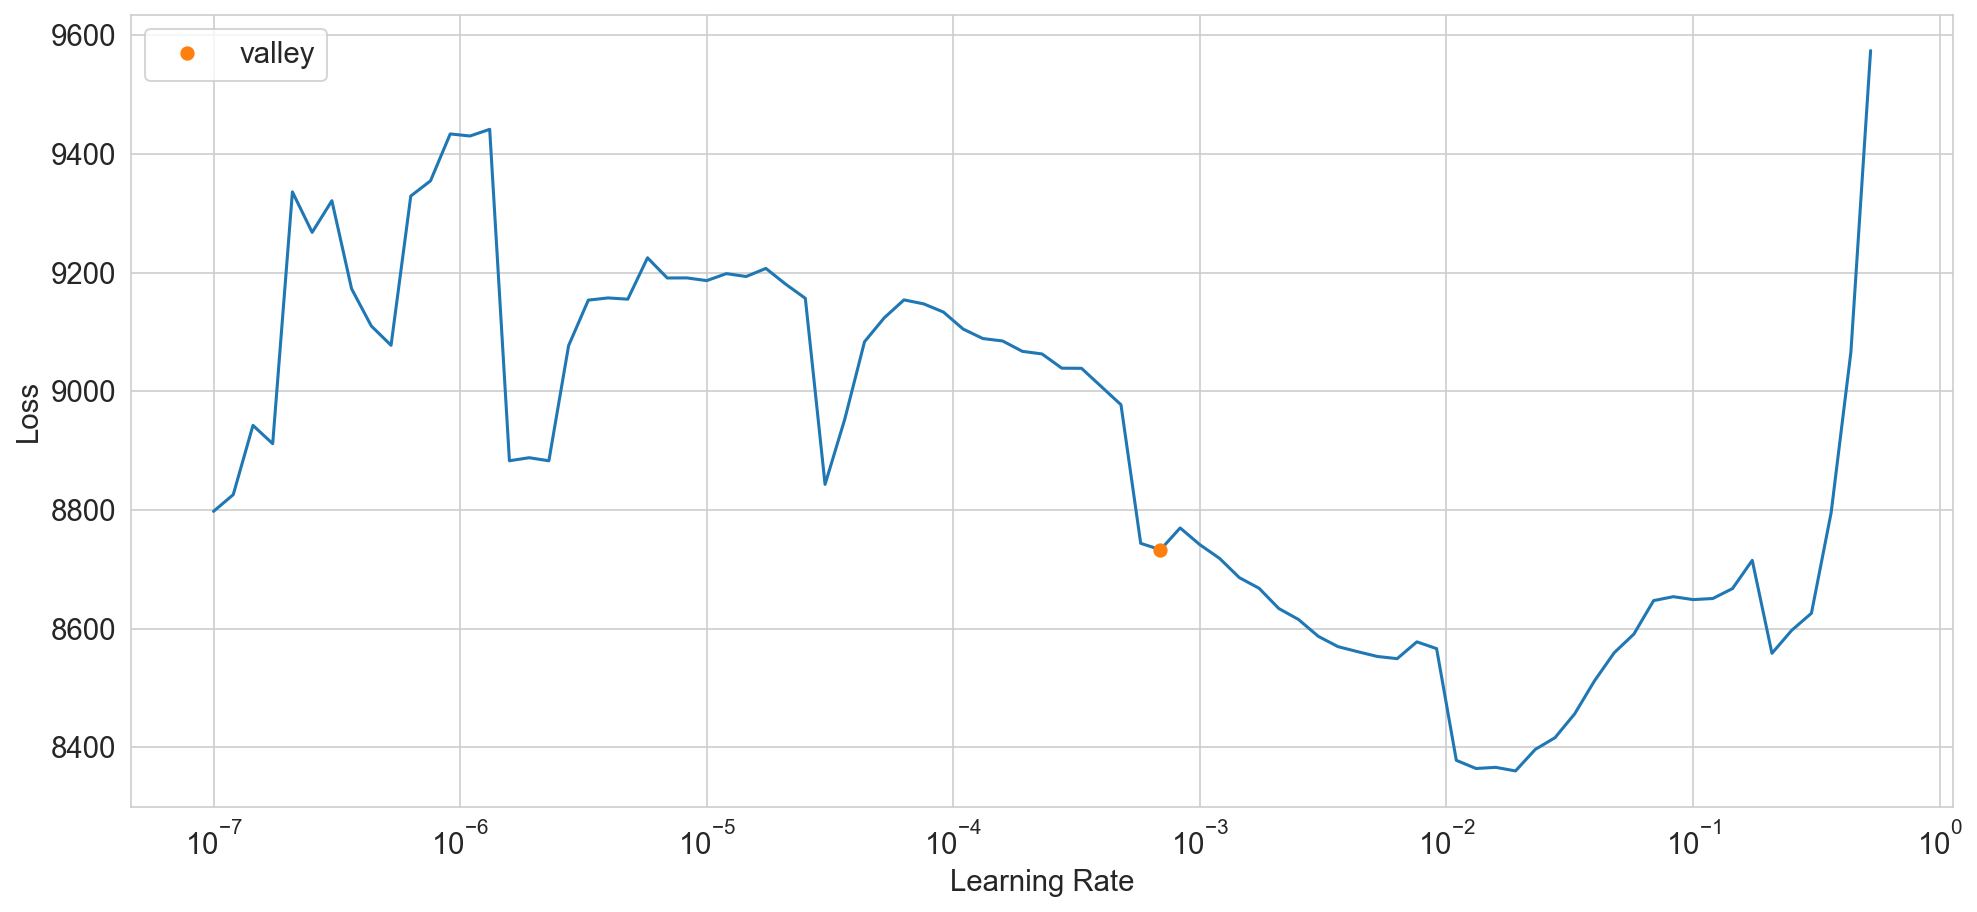

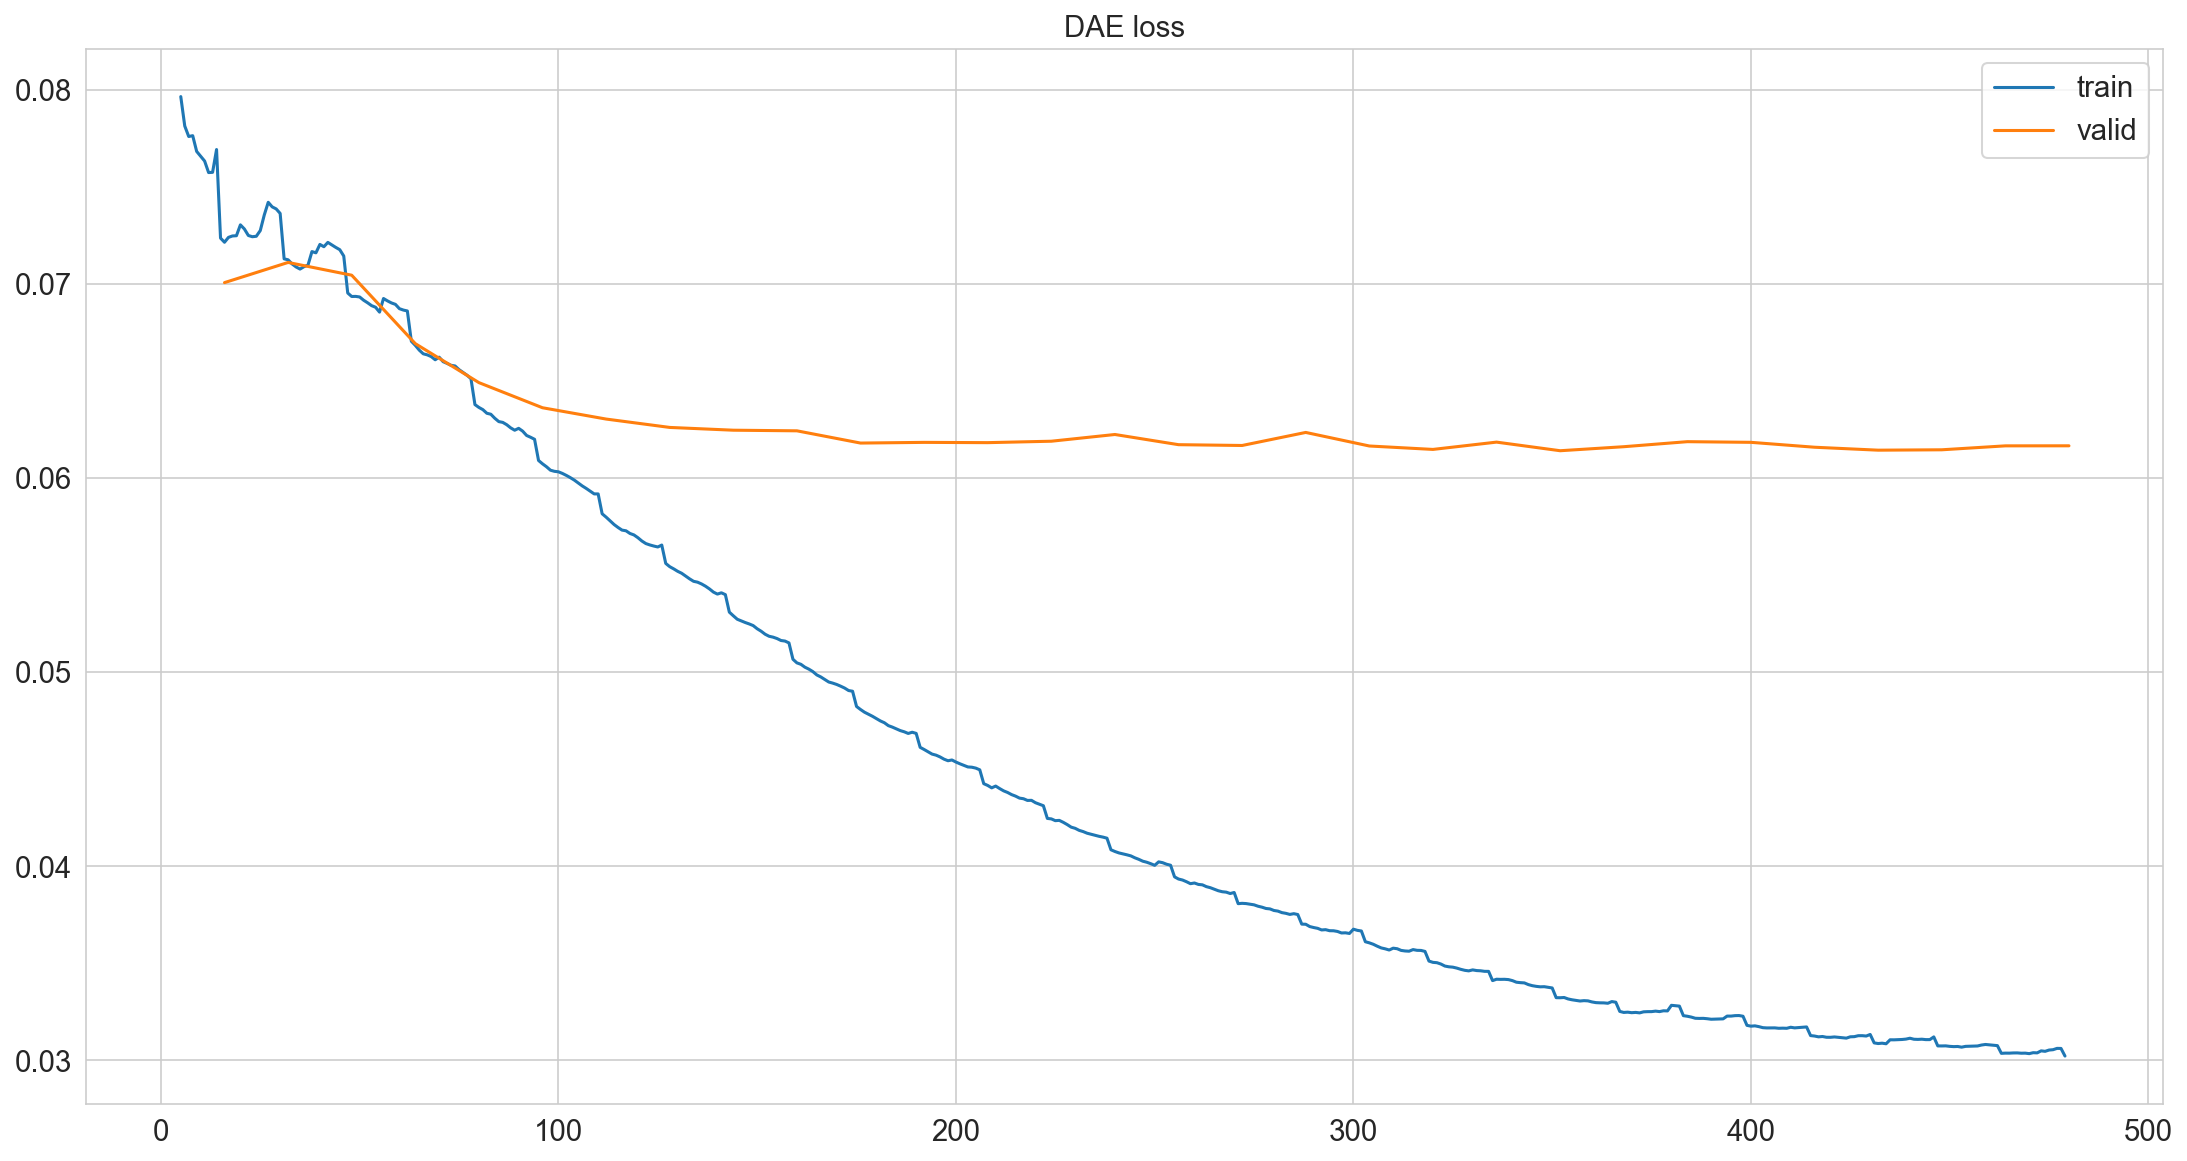

In [178]:
#impute missing values in a wide matrix df_filtered using a PIMMS DAE.

#df_filtered : wide matrix (rows = samples, columns = features) with missing values to impute.
#epochs : maximum number of training epochs.
#run_locally : if True, change to local_run directory before fitting the model.

dae_imputed= msp.impute_dae(df_filtered, epochs=30, run_locally=True)
dae_imputed

### Outliers Removal

In [180]:
#choose best imputation method
proteome_imputed = dae_imputed

In [139]:
msp.plot_rowmean_outliers(proteome_imputed)

In [138]:
msp.plot_hotelling_outliers(proteome_imputed, var_explained=0.50, alpha=0.99)

In [181]:
no_outliers = msp.remove_hotelling_outliers(proteome_imputed, var_explained=0.50, alpha=0.99)
no_outliers

Removed samples: MultiIndex([('4083903724',      'Control', '100069', 'F10', 'plate1', ...),
            ('4083927643',      'Control', '100126',  'C7', 'plate2', ...),
            ('4083932552',      'Control', '100140',  'D9', 'plate2', ...),
            ('4083979472', 'Intervention', '100062',  'F3', 'plate1', ...)],
           names=['label_id', 'group', 'AL_kode', 'plate_position', 'plate_nr', 'sample_name', 'sample_type', 'study_ID', 'timepoint'])


,,,,,,,,protein group,A0A075B6H9,A0A075B6I9,A0A075B6J1,A0A075B6J2,A0A075B6J9,A0A075B6K0,A0A075B6K2,A0A075B6K4,A0A075B6K5,A0A075B6K6,...,Q9Y608,Q9Y613,Q9Y624,Q9Y646,Q9Y696,Q9Y6C2,Q9Y6E0,Q9Y6N7,Q9Y6R7,Q9Y6Z7
label_id,group,AL_kode,plate_position,plate_nr,sample_name,sample_type,study_ID,timepoint,,,,,,,,,,,,,,,,,,,,,
4083900735,Control,100142,D11,plate2,plate2_D11,sample,28.0,day_15,16.853,27.510,20.635,20.206,25.147,25.153,18.318,27.079,28.532,17.412,...,17.272,16.594,18.951,15.250,16.827,14.092,16.802,13.655,23.217,22.647
4083903081,Control,100015,B4,plate1,plate1_B4,sample,64.0,day_0,18.108,26.028,21.047,20.010,25.518,26.723,19.378,27.943,29.622,17.032,...,16.759,16.467,19.872,14.621,17.470,13.548,16.613,12.958,23.308,23.244
4083903468,Intervention,100036,D1,plate1,plate1_D1,sample,78.0,day_15,18.220,26.013,20.546,20.140,23.923,25.160,21.351,24.757,28.883,18.542,...,16.797,17.563,19.972,16.152,17.784,13.859,17.935,13.297,23.121,23.711
4083904375,Control,100010,A11,plate1,plate1_A11,sample,8.0,day_15,18.173,26.441,19.081,18.769,25.666,25.386,20.025,24.759,27.057,17.495,...,16.356,17.224,21.178,16.271,17.569,14.296,18.864,13.428,21.979,22.312
4083905829,Intervention,100087,H4,plate1,plate1_H4,sample,29.0,day_15,16.880,27.919,21.225,19.367,24.114,25.288,19.552,26.795,28.905,17.337,...,16.915,17.689,20.170,16.693,17.302,14.039,17.702,13.260,22.903,22.528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083996660,Control,100153,E10,plate2,plate2_E10,sample,57.0,day_0,20.170,27.885,20.635,18.808,25.149,24.279,20.008,24.984,27.700,16.332,...,17.208,17.021,18.361,16.697,16.712,13.010,17.035,13.277,22.146,22.921
4083996961,Intervention,100071,F12,plate1,plate1_F12,sample,29.0,day_0,16.865,27.500,21.987,19.317,24.138,24.951,19.408,25.228,28.029,17.206,...,15.590,17.431,19.067,16.211,16.986,13.152,17.398,13.185,22.881,22.757
4083997419,Control,100065,F6,plate1,plate1_F6,sample,54.0,day_15,18.368,28.113,19.761,19.612,24.385,24.892,19.223,25.260,27.772,19.907,...,17.216,16.902,20.177,16.537,17.268,13.418,18.111,13.333,22.563,23.099


### Batch Correction

In [93]:
import importlib
import MSpreprocessing as msp
msp = importlib.reload(msp)          # reload after edits
print(msp.__file__)                  # sanity check it’s the file you expect


l:\LovbeskyttetMapper01\Proteom Data\HIV (Proteomic_23)\notebooks\MSpreprocessing.py


In [182]:
msp.plot_umap(proteome_imputed, color_by = "plate_nr")

WARNING	Task(Task-4) py.warnings:warnings.py:_showwarnmsg()- c:\Users\aben0177\Documents\venvs\MSpreprocessing\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.




In [ ]:
#batch processing

batch_corrected = pycombat_norm(no_outliers.T,no_outliers.reset_index()['plate_nr'].tolist()).T


### Normalization

In [184]:
#assumes sample_name is platenumber_plateposition

msp.sample_density_heatmap(batch_corrected)

In [188]:
msp.plot_sample_means(batch_corrected)

In [185]:

def normalize_sample_means(
    df: pd.DataFrame,
    round_digits: int = 3
):
    """
    Normalize a DataFrame so that all rows (samples) have the same mean value.

    df : DataFrame where rows are samples and columns are features
    round_digits : number of decimal digits to round to

    """
    sample_means = df.mean(axis=1)
    overall_mean = sample_means.mean()

    df_norm = df.div(sample_means, axis=0)
    df_norm = df_norm.mul(overall_mean)

    df_norm = df_norm.round(round_digits)

    return df_norm

In [186]:
df_norm = normalize_sample_means(batch_corrected)
df_norm

,,,,,,,,protein group,A0A075B6H9,A0A075B6I9,A0A075B6J1,A0A075B6J2,A0A075B6J9,A0A075B6K0,A0A075B6K2,A0A075B6K4,A0A075B6K5,A0A075B6K6,...,Q9Y608,Q9Y613,Q9Y624,Q9Y646,Q9Y696,Q9Y6C2,Q9Y6E0,Q9Y6N7,Q9Y6R7,Q9Y6Z7
label_id,group,AL_kode,plate_position,plate_nr,sample_name,sample_type,study_ID,timepoint,,,,,,,,,,,,,,,,,,,,,
4083900735,Control,100142,D11,plate2,plate2_D11,sample,28.0,day_15,16.882,27.707,20.818,20.358,25.363,25.414,18.477,27.187,28.753,17.587,...,17.298,16.750,19.074,15.323,17.005,14.347,16.825,13.789,23.383,22.767
4083903081,Control,100015,B4,plate1,plate1_B4,sample,64.0,day_0,18.258,26.069,21.040,20.012,25.515,26.662,19.392,28.009,29.618,17.015,...,16.821,16.463,19.862,14.659,17.426,13.496,16.672,12.963,23.322,23.265
4083903468,Intervention,100036,D1,plate1,plate1_D1,sample,78.0,day_15,18.247,25.875,20.396,20.005,23.723,24.960,21.241,24.633,28.688,18.392,...,16.744,17.406,19.823,16.078,17.603,13.702,17.791,13.203,22.974,23.557
4083904375,Control,100010,A11,plate1,plate1_A11,sample,8.0,day_15,18.067,26.102,18.801,18.494,25.303,24.996,19.763,24.457,26.697,17.230,...,16.182,16.955,20.831,16.078,17.273,14.019,18.522,13.234,21.670,22.042
4083905829,Intervention,100087,H4,plate1,plate1_H4,sample,29.0,day_15,16.838,27.668,21.019,19.182,23.858,25.023,19.386,26.604,28.639,17.158,...,16.821,17.485,19.964,16.574,17.104,13.841,17.531,13.135,22.699,22.358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083996660,Control,100153,E10,plate2,plate2_E10,sample,57.0,day_0,19.824,27.852,20.639,18.824,25.146,24.290,19.954,24.909,27.665,16.358,...,17.088,17.056,18.286,16.620,16.732,13.079,16.948,13.279,22.142,22.857
4083996961,Intervention,100071,F12,plate1,plate1_F12,sample,29.0,day_0,17.005,27.555,22.013,19.340,24.141,24.964,19.450,25.314,28.081,17.213,...,15.662,17.424,19.109,16.271,16.987,13.132,17.435,13.204,22.922,22.823
4083997419,Control,100065,F6,plate1,plate1_F6,sample,54.0,day_15,18.329,27.821,19.543,19.403,24.101,24.608,19.032,25.042,27.493,19.668,...,17.101,16.707,19.945,16.399,17.050,13.230,17.888,13.189,22.331,22.879


In [187]:
msp.plot_sample_means(df_norm)